In [1]:
import numpy as np
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [10]:
def read_kImage(path):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(path)
    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)
    return ct_scan

In [2]:
def generate_tables():
    basedir = "../1/train/ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2"
    findingsfile = "{}/{}".format(basedir,"ProstateX-Findings-Train.csv")
    imagesfile = "{}/{}".format(basedir,"ProstateX-Images-Train.csv")
    kimagesfile = "{}/{}".format(basedir,"ProstateX-Images-KTrans-Train.csv")
    #Generamos las 3 tablas básicas a partir de los archivos.cvs
    findings_table = pd.read_csv(findingsfile)
    images_table = pd.read_csv(imagesfile)
    kimages_table = pd.read_csv(kimagesfile)
    #Operación de inner join entre tablas.
    join_kimages_table = pd.merge(left=findings_table, right= kimages_table, how ="inner", on=["ProxID","fid","pos"])
    join_images_table =  pd.merge(left=findings_table, right=  images_table, how ="inner", on=["ProxID","fid","pos"])
    #agregamos una columna para insertar la imagen
    join_images_table["MRI"] = pd.Series(np.zeros((len(join_images_table),2,2,2)).tolist(), index= join_images_table.index)
    join_kimages_table["Kimg"] = pd.Series(np.zeros((len(join_kimages_table),2,2,2)).tolist(), index= join_kimages_table.index)
    return join_images_table, join_kimages_table

In [3]:
def extract_voxel_data(series_path):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames( series_path )
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    image_3d = sitk.GetArrayFromImage(image)
    return image_3d

In [4]:
def set_MRI_value(index,image_3d):
    join_images_table.at[index,"MRI"] = image_3d

In [11]:
def set_kImg_value(index,image_3d):
    join_kimages_table.at[index,"Kimg"] = image_3d

In [5]:
def insert_MRI_images():
    for row in range (len(join_images_table)):
        patient_id = join_images_table.ProxID.iloc[row]
        series_name = join_images_table.DCMSerDescr.iloc[row]
        series_id = join_images_table.DCMSerNum.iloc[row]
        path = "../1/Train/PROSTATEx/{}/".format(patient_id)#Selects the Patient ID
        path = "{}/{}".format(path,os.listdir(path)[0])#Selects the default folder inside the patient
        sequences = os.listdir(path) # Selects all the sequences
        sequence = [ sequence for sequence in sequences if sequence[0:len(str(series_id))] == str(series_id) ] [0]
        del sequences
        path = "{}/{}".format(path,sequence)
        image_3d = extract_voxel_data(path)
        del path
        del patient_id
        del series_name
        del series_id
        set_MRI_value(row,image_3d)
        print("Se ha cargado la imagen 3d #{}".format(row))

In [6]:
join_images_table, join_kimages_table =  generate_tables()
insert_MRI_images()

Se ha cargado la imagen 3d #0
Se ha cargado la imagen 3d #1
Se ha cargado la imagen 3d #2
Se ha cargado la imagen 3d #3
Se ha cargado la imagen 3d #4
Se ha cargado la imagen 3d #5
Se ha cargado la imagen 3d #6
Se ha cargado la imagen 3d #7
Se ha cargado la imagen 3d #8
Se ha cargado la imagen 3d #9
Se ha cargado la imagen 3d #10
Se ha cargado la imagen 3d #11
Se ha cargado la imagen 3d #12
Se ha cargado la imagen 3d #13
Se ha cargado la imagen 3d #14
Se ha cargado la imagen 3d #15
Se ha cargado la imagen 3d #16
Se ha cargado la imagen 3d #17
Se ha cargado la imagen 3d #18
Se ha cargado la imagen 3d #19
Se ha cargado la imagen 3d #20
Se ha cargado la imagen 3d #21
Se ha cargado la imagen 3d #22
Se ha cargado la imagen 3d #23
Se ha cargado la imagen 3d #24
Se ha cargado la imagen 3d #25
Se ha cargado la imagen 3d #26
Se ha cargado la imagen 3d #27
Se ha cargado la imagen 3d #28
Se ha cargado la imagen 3d #29
Se ha cargado la imagen 3d #30
Se ha cargado la imagen 3d #31
Se ha cargado la i

Se ha cargado la imagen 3d #261
Se ha cargado la imagen 3d #262
Se ha cargado la imagen 3d #263
Se ha cargado la imagen 3d #264
Se ha cargado la imagen 3d #265
Se ha cargado la imagen 3d #266
Se ha cargado la imagen 3d #267
Se ha cargado la imagen 3d #268
Se ha cargado la imagen 3d #269
Se ha cargado la imagen 3d #270
Se ha cargado la imagen 3d #271
Se ha cargado la imagen 3d #272
Se ha cargado la imagen 3d #273
Se ha cargado la imagen 3d #274
Se ha cargado la imagen 3d #275
Se ha cargado la imagen 3d #276
Se ha cargado la imagen 3d #277
Se ha cargado la imagen 3d #278
Se ha cargado la imagen 3d #279
Se ha cargado la imagen 3d #280
Se ha cargado la imagen 3d #281
Se ha cargado la imagen 3d #282
Se ha cargado la imagen 3d #283
Se ha cargado la imagen 3d #284
Se ha cargado la imagen 3d #285
Se ha cargado la imagen 3d #286
Se ha cargado la imagen 3d #287
Se ha cargado la imagen 3d #288
Se ha cargado la imagen 3d #289
Se ha cargado la imagen 3d #290
Se ha cargado la imagen 3d #291
Se ha ca

Se ha cargado la imagen 3d #522
Se ha cargado la imagen 3d #523
Se ha cargado la imagen 3d #524
Se ha cargado la imagen 3d #525
Se ha cargado la imagen 3d #526
Se ha cargado la imagen 3d #527
Se ha cargado la imagen 3d #528
Se ha cargado la imagen 3d #529
Se ha cargado la imagen 3d #530
Se ha cargado la imagen 3d #531
Se ha cargado la imagen 3d #532
Se ha cargado la imagen 3d #533
Se ha cargado la imagen 3d #534
Se ha cargado la imagen 3d #535
Se ha cargado la imagen 3d #536
Se ha cargado la imagen 3d #537
Se ha cargado la imagen 3d #538
Se ha cargado la imagen 3d #539
Se ha cargado la imagen 3d #540
Se ha cargado la imagen 3d #541
Se ha cargado la imagen 3d #542
Se ha cargado la imagen 3d #543
Se ha cargado la imagen 3d #544
Se ha cargado la imagen 3d #545
Se ha cargado la imagen 3d #546
Se ha cargado la imagen 3d #547
Se ha cargado la imagen 3d #548
Se ha cargado la imagen 3d #549
Se ha cargado la imagen 3d #550
Se ha cargado la imagen 3d #551
Se ha cargado la imagen 3d #552
Se ha ca

Se ha cargado la imagen 3d #781
Se ha cargado la imagen 3d #782
Se ha cargado la imagen 3d #783
Se ha cargado la imagen 3d #784
Se ha cargado la imagen 3d #785
Se ha cargado la imagen 3d #786
Se ha cargado la imagen 3d #787
Se ha cargado la imagen 3d #788
Se ha cargado la imagen 3d #789
Se ha cargado la imagen 3d #790
Se ha cargado la imagen 3d #791
Se ha cargado la imagen 3d #792
Se ha cargado la imagen 3d #793
Se ha cargado la imagen 3d #794
Se ha cargado la imagen 3d #795
Se ha cargado la imagen 3d #796
Se ha cargado la imagen 3d #797
Se ha cargado la imagen 3d #798
Se ha cargado la imagen 3d #799
Se ha cargado la imagen 3d #800
Se ha cargado la imagen 3d #801
Se ha cargado la imagen 3d #802
Se ha cargado la imagen 3d #803
Se ha cargado la imagen 3d #804
Se ha cargado la imagen 3d #805
Se ha cargado la imagen 3d #806
Se ha cargado la imagen 3d #807
Se ha cargado la imagen 3d #808
Se ha cargado la imagen 3d #809
Se ha cargado la imagen 3d #810
Se ha cargado la imagen 3d #811
Se ha ca

Se ha cargado la imagen 3d #1040
Se ha cargado la imagen 3d #1041
Se ha cargado la imagen 3d #1042
Se ha cargado la imagen 3d #1043
Se ha cargado la imagen 3d #1044
Se ha cargado la imagen 3d #1045
Se ha cargado la imagen 3d #1046
Se ha cargado la imagen 3d #1047
Se ha cargado la imagen 3d #1048
Se ha cargado la imagen 3d #1049
Se ha cargado la imagen 3d #1050
Se ha cargado la imagen 3d #1051
Se ha cargado la imagen 3d #1052
Se ha cargado la imagen 3d #1053
Se ha cargado la imagen 3d #1054
Se ha cargado la imagen 3d #1055
Se ha cargado la imagen 3d #1056
Se ha cargado la imagen 3d #1057
Se ha cargado la imagen 3d #1058
Se ha cargado la imagen 3d #1059
Se ha cargado la imagen 3d #1060
Se ha cargado la imagen 3d #1061
Se ha cargado la imagen 3d #1062
Se ha cargado la imagen 3d #1063
Se ha cargado la imagen 3d #1064
Se ha cargado la imagen 3d #1065
Se ha cargado la imagen 3d #1066
Se ha cargado la imagen 3d #1067
Se ha cargado la imagen 3d #1068
Se ha cargado la imagen 3d #1069
Se ha carg

Se ha cargado la imagen 3d #1289
Se ha cargado la imagen 3d #1290
Se ha cargado la imagen 3d #1291
Se ha cargado la imagen 3d #1292
Se ha cargado la imagen 3d #1293
Se ha cargado la imagen 3d #1294
Se ha cargado la imagen 3d #1295
Se ha cargado la imagen 3d #1296
Se ha cargado la imagen 3d #1297
Se ha cargado la imagen 3d #1298
Se ha cargado la imagen 3d #1299
Se ha cargado la imagen 3d #1300
Se ha cargado la imagen 3d #1301
Se ha cargado la imagen 3d #1302
Se ha cargado la imagen 3d #1303
Se ha cargado la imagen 3d #1304
Se ha cargado la imagen 3d #1305
Se ha cargado la imagen 3d #1306
Se ha cargado la imagen 3d #1307
Se ha cargado la imagen 3d #1308
Se ha cargado la imagen 3d #1309
Se ha cargado la imagen 3d #1310
Se ha cargado la imagen 3d #1311
Se ha cargado la imagen 3d #1312
Se ha cargado la imagen 3d #1313
Se ha cargado la imagen 3d #1314
Se ha cargado la imagen 3d #1315
Se ha cargado la imagen 3d #1316
Se ha cargado la imagen 3d #1317
Se ha cargado la imagen 3d #1318
Se ha carg

Se ha cargado la imagen 3d #1543
Se ha cargado la imagen 3d #1544
Se ha cargado la imagen 3d #1545
Se ha cargado la imagen 3d #1546
Se ha cargado la imagen 3d #1547
Se ha cargado la imagen 3d #1548
Se ha cargado la imagen 3d #1549
Se ha cargado la imagen 3d #1550
Se ha cargado la imagen 3d #1551
Se ha cargado la imagen 3d #1552
Se ha cargado la imagen 3d #1553
Se ha cargado la imagen 3d #1554
Se ha cargado la imagen 3d #1555
Se ha cargado la imagen 3d #1556
Se ha cargado la imagen 3d #1557
Se ha cargado la imagen 3d #1558
Se ha cargado la imagen 3d #1559
Se ha cargado la imagen 3d #1560
Se ha cargado la imagen 3d #1561
Se ha cargado la imagen 3d #1562
Se ha cargado la imagen 3d #1563
Se ha cargado la imagen 3d #1564
Se ha cargado la imagen 3d #1565
Se ha cargado la imagen 3d #1566
Se ha cargado la imagen 3d #1567
Se ha cargado la imagen 3d #1568
Se ha cargado la imagen 3d #1569
Se ha cargado la imagen 3d #1570
Se ha cargado la imagen 3d #1571
Se ha cargado la imagen 3d #1572
Se ha carg

Se ha cargado la imagen 3d #1796
Se ha cargado la imagen 3d #1797
Se ha cargado la imagen 3d #1798
Se ha cargado la imagen 3d #1799
Se ha cargado la imagen 3d #1800
Se ha cargado la imagen 3d #1801
Se ha cargado la imagen 3d #1802
Se ha cargado la imagen 3d #1803
Se ha cargado la imagen 3d #1804
Se ha cargado la imagen 3d #1805
Se ha cargado la imagen 3d #1806
Se ha cargado la imagen 3d #1807
Se ha cargado la imagen 3d #1808
Se ha cargado la imagen 3d #1809
Se ha cargado la imagen 3d #1810
Se ha cargado la imagen 3d #1811
Se ha cargado la imagen 3d #1812
Se ha cargado la imagen 3d #1813
Se ha cargado la imagen 3d #1814
Se ha cargado la imagen 3d #1815
Se ha cargado la imagen 3d #1816
Se ha cargado la imagen 3d #1817
Se ha cargado la imagen 3d #1818
Se ha cargado la imagen 3d #1819
Se ha cargado la imagen 3d #1820
Se ha cargado la imagen 3d #1821
Se ha cargado la imagen 3d #1822
Se ha cargado la imagen 3d #1823
Se ha cargado la imagen 3d #1824
Se ha cargado la imagen 3d #1825
Se ha carg

Se ha cargado la imagen 3d #2046
Se ha cargado la imagen 3d #2047
Se ha cargado la imagen 3d #2048
Se ha cargado la imagen 3d #2049
Se ha cargado la imagen 3d #2050
Se ha cargado la imagen 3d #2051
Se ha cargado la imagen 3d #2052
Se ha cargado la imagen 3d #2053
Se ha cargado la imagen 3d #2054
Se ha cargado la imagen 3d #2055
Se ha cargado la imagen 3d #2056
Se ha cargado la imagen 3d #2057
Se ha cargado la imagen 3d #2058
Se ha cargado la imagen 3d #2059
Se ha cargado la imagen 3d #2060
Se ha cargado la imagen 3d #2061
Se ha cargado la imagen 3d #2062
Se ha cargado la imagen 3d #2063
Se ha cargado la imagen 3d #2064
Se ha cargado la imagen 3d #2065
Se ha cargado la imagen 3d #2066
Se ha cargado la imagen 3d #2067
Se ha cargado la imagen 3d #2068
Se ha cargado la imagen 3d #2069
Se ha cargado la imagen 3d #2070
Se ha cargado la imagen 3d #2071
Se ha cargado la imagen 3d #2072
Se ha cargado la imagen 3d #2073
Se ha cargado la imagen 3d #2074
Se ha cargado la imagen 3d #2075
Se ha carg

Se ha cargado la imagen 3d #2295
Se ha cargado la imagen 3d #2296
Se ha cargado la imagen 3d #2297
Se ha cargado la imagen 3d #2298
Se ha cargado la imagen 3d #2299
Se ha cargado la imagen 3d #2300
Se ha cargado la imagen 3d #2301
Se ha cargado la imagen 3d #2302
Se ha cargado la imagen 3d #2303
Se ha cargado la imagen 3d #2304
Se ha cargado la imagen 3d #2305
Se ha cargado la imagen 3d #2306
Se ha cargado la imagen 3d #2307
Se ha cargado la imagen 3d #2308
Se ha cargado la imagen 3d #2309
Se ha cargado la imagen 3d #2310
Se ha cargado la imagen 3d #2311
Se ha cargado la imagen 3d #2312
Se ha cargado la imagen 3d #2313
Se ha cargado la imagen 3d #2314
Se ha cargado la imagen 3d #2315
Se ha cargado la imagen 3d #2316
Se ha cargado la imagen 3d #2317
Se ha cargado la imagen 3d #2318
Se ha cargado la imagen 3d #2319
Se ha cargado la imagen 3d #2320
Se ha cargado la imagen 3d #2321
Se ha cargado la imagen 3d #2322
Se ha cargado la imagen 3d #2323
Se ha cargado la imagen 3d #2324
Se ha carg

Se ha cargado la imagen 3d #2544
Se ha cargado la imagen 3d #2545
Se ha cargado la imagen 3d #2546
Se ha cargado la imagen 3d #2547
Se ha cargado la imagen 3d #2548
Se ha cargado la imagen 3d #2549
Se ha cargado la imagen 3d #2550
Se ha cargado la imagen 3d #2551
Se ha cargado la imagen 3d #2552
Se ha cargado la imagen 3d #2553
Se ha cargado la imagen 3d #2554
Se ha cargado la imagen 3d #2555
Se ha cargado la imagen 3d #2556
Se ha cargado la imagen 3d #2557
Se ha cargado la imagen 3d #2558
Se ha cargado la imagen 3d #2559
Se ha cargado la imagen 3d #2560
Se ha cargado la imagen 3d #2561
Se ha cargado la imagen 3d #2562
Se ha cargado la imagen 3d #2563
Se ha cargado la imagen 3d #2564
Se ha cargado la imagen 3d #2565
Se ha cargado la imagen 3d #2566
Se ha cargado la imagen 3d #2567
Se ha cargado la imagen 3d #2568
Se ha cargado la imagen 3d #2569
Se ha cargado la imagen 3d #2570
Se ha cargado la imagen 3d #2571
Se ha cargado la imagen 3d #2572
Se ha cargado la imagen 3d #2573
Se ha carg

Se ha cargado la imagen 3d #2793
Se ha cargado la imagen 3d #2794
Se ha cargado la imagen 3d #2795
Se ha cargado la imagen 3d #2796
Se ha cargado la imagen 3d #2797
Se ha cargado la imagen 3d #2798
Se ha cargado la imagen 3d #2799
Se ha cargado la imagen 3d #2800
Se ha cargado la imagen 3d #2801
Se ha cargado la imagen 3d #2802
Se ha cargado la imagen 3d #2803
Se ha cargado la imagen 3d #2804
Se ha cargado la imagen 3d #2805
Se ha cargado la imagen 3d #2806
Se ha cargado la imagen 3d #2807
Se ha cargado la imagen 3d #2808
Se ha cargado la imagen 3d #2809
Se ha cargado la imagen 3d #2810
Se ha cargado la imagen 3d #2811
Se ha cargado la imagen 3d #2812
Se ha cargado la imagen 3d #2813
Se ha cargado la imagen 3d #2814
Se ha cargado la imagen 3d #2815
Se ha cargado la imagen 3d #2816
Se ha cargado la imagen 3d #2817
Se ha cargado la imagen 3d #2818
Se ha cargado la imagen 3d #2819
Se ha cargado la imagen 3d #2820
Se ha cargado la imagen 3d #2821
Se ha cargado la imagen 3d #2822
Se ha carg

Se ha cargado la imagen 3d #3042
Se ha cargado la imagen 3d #3043
Se ha cargado la imagen 3d #3044
Se ha cargado la imagen 3d #3045
Se ha cargado la imagen 3d #3046
Se ha cargado la imagen 3d #3047
Se ha cargado la imagen 3d #3048
Se ha cargado la imagen 3d #3049
Se ha cargado la imagen 3d #3050
Se ha cargado la imagen 3d #3051
Se ha cargado la imagen 3d #3052
Se ha cargado la imagen 3d #3053
Se ha cargado la imagen 3d #3054
Se ha cargado la imagen 3d #3055
Se ha cargado la imagen 3d #3056
Se ha cargado la imagen 3d #3057
Se ha cargado la imagen 3d #3058
Se ha cargado la imagen 3d #3059
Se ha cargado la imagen 3d #3060
Se ha cargado la imagen 3d #3061
Se ha cargado la imagen 3d #3062
Se ha cargado la imagen 3d #3063
Se ha cargado la imagen 3d #3064
Se ha cargado la imagen 3d #3065
Se ha cargado la imagen 3d #3066
Se ha cargado la imagen 3d #3067
Se ha cargado la imagen 3d #3068
Se ha cargado la imagen 3d #3069
Se ha cargado la imagen 3d #3070
Se ha cargado la imagen 3d #3071
Se ha carg

Se ha cargado la imagen 3d #3291
Se ha cargado la imagen 3d #3292
Se ha cargado la imagen 3d #3293
Se ha cargado la imagen 3d #3294
Se ha cargado la imagen 3d #3295
Se ha cargado la imagen 3d #3296
Se ha cargado la imagen 3d #3297
Se ha cargado la imagen 3d #3298
Se ha cargado la imagen 3d #3299
Se ha cargado la imagen 3d #3300
Se ha cargado la imagen 3d #3301
Se ha cargado la imagen 3d #3302
Se ha cargado la imagen 3d #3303
Se ha cargado la imagen 3d #3304
Se ha cargado la imagen 3d #3305
Se ha cargado la imagen 3d #3306
Se ha cargado la imagen 3d #3307
Se ha cargado la imagen 3d #3308
Se ha cargado la imagen 3d #3309
Se ha cargado la imagen 3d #3310
Se ha cargado la imagen 3d #3311
Se ha cargado la imagen 3d #3312
Se ha cargado la imagen 3d #3313
Se ha cargado la imagen 3d #3314
Se ha cargado la imagen 3d #3315
Se ha cargado la imagen 3d #3316
Se ha cargado la imagen 3d #3317
Se ha cargado la imagen 3d #3318
Se ha cargado la imagen 3d #3319
Se ha cargado la imagen 3d #3320
Se ha carg

Se ha cargado la imagen 3d #3551
Se ha cargado la imagen 3d #3552
Se ha cargado la imagen 3d #3553
Se ha cargado la imagen 3d #3554
Se ha cargado la imagen 3d #3555
Se ha cargado la imagen 3d #3556
Se ha cargado la imagen 3d #3557
Se ha cargado la imagen 3d #3558
Se ha cargado la imagen 3d #3559
Se ha cargado la imagen 3d #3560
Se ha cargado la imagen 3d #3561
Se ha cargado la imagen 3d #3562
Se ha cargado la imagen 3d #3563
Se ha cargado la imagen 3d #3564
Se ha cargado la imagen 3d #3565
Se ha cargado la imagen 3d #3566
Se ha cargado la imagen 3d #3567
Se ha cargado la imagen 3d #3568
Se ha cargado la imagen 3d #3569
Se ha cargado la imagen 3d #3570
Se ha cargado la imagen 3d #3571
Se ha cargado la imagen 3d #3572
Se ha cargado la imagen 3d #3573
Se ha cargado la imagen 3d #3574
Se ha cargado la imagen 3d #3575
Se ha cargado la imagen 3d #3576
Se ha cargado la imagen 3d #3577
Se ha cargado la imagen 3d #3578
Se ha cargado la imagen 3d #3579
Se ha cargado la imagen 3d #3580
Se ha carg

Se ha cargado la imagen 3d #3800
Se ha cargado la imagen 3d #3801
Se ha cargado la imagen 3d #3802
Se ha cargado la imagen 3d #3803
Se ha cargado la imagen 3d #3804
Se ha cargado la imagen 3d #3805
Se ha cargado la imagen 3d #3806
Se ha cargado la imagen 3d #3807
Se ha cargado la imagen 3d #3808
Se ha cargado la imagen 3d #3809
Se ha cargado la imagen 3d #3810
Se ha cargado la imagen 3d #3811
Se ha cargado la imagen 3d #3812
Se ha cargado la imagen 3d #3813
Se ha cargado la imagen 3d #3814
Se ha cargado la imagen 3d #3815
Se ha cargado la imagen 3d #3816
Se ha cargado la imagen 3d #3817
Se ha cargado la imagen 3d #3818
Se ha cargado la imagen 3d #3819
Se ha cargado la imagen 3d #3820
Se ha cargado la imagen 3d #3821
Se ha cargado la imagen 3d #3822
Se ha cargado la imagen 3d #3823
Se ha cargado la imagen 3d #3824
Se ha cargado la imagen 3d #3825
Se ha cargado la imagen 3d #3826
Se ha cargado la imagen 3d #3827
Se ha cargado la imagen 3d #3828
Se ha cargado la imagen 3d #3829
Se ha carg

In [13]:
for row in range(len(join_kimages_table)):
    path = "../1/Train/ProstateXKtrains-train-fixed"
    patient_id = join_kimages_table.ProxID.iloc[row]
    path = "{}/{}".format(path,patient_id)
    path = "{}/{}-Ktrans.mhd".format(path,patient_id)
    kimage_3d = read_kImage(path)
    set_kImg_value(row,kimage_3d)
    print("Se ha cargado la kImg 3d #{}".format(row))
    del path,patient_id,kimage_3d
    

Se ha cargado la kImg 3d #0
Se ha cargado la kImg 3d #1
Se ha cargado la kImg 3d #2
Se ha cargado la kImg 3d #3
Se ha cargado la kImg 3d #4
Se ha cargado la kImg 3d #5
Se ha cargado la kImg 3d #6
Se ha cargado la kImg 3d #7
Se ha cargado la kImg 3d #8
Se ha cargado la kImg 3d #9
Se ha cargado la kImg 3d #10
Se ha cargado la kImg 3d #11
Se ha cargado la kImg 3d #12
Se ha cargado la kImg 3d #13
Se ha cargado la kImg 3d #14
Se ha cargado la kImg 3d #15
Se ha cargado la kImg 3d #16
Se ha cargado la kImg 3d #17
Se ha cargado la kImg 3d #18
Se ha cargado la kImg 3d #19
Se ha cargado la kImg 3d #20
Se ha cargado la kImg 3d #21
Se ha cargado la kImg 3d #22
Se ha cargado la kImg 3d #23
Se ha cargado la kImg 3d #24
Se ha cargado la kImg 3d #25
Se ha cargado la kImg 3d #26
Se ha cargado la kImg 3d #27
Se ha cargado la kImg 3d #28
Se ha cargado la kImg 3d #29
Se ha cargado la kImg 3d #30
Se ha cargado la kImg 3d #31
Se ha cargado la kImg 3d #32
Se ha cargado la kImg 3d #33
Se ha cargado la kImg 3d

Se ha cargado la kImg 3d #284
Se ha cargado la kImg 3d #285
Se ha cargado la kImg 3d #286
Se ha cargado la kImg 3d #287
Se ha cargado la kImg 3d #288
Se ha cargado la kImg 3d #289
Se ha cargado la kImg 3d #290
Se ha cargado la kImg 3d #291
Se ha cargado la kImg 3d #292
Se ha cargado la kImg 3d #293
Se ha cargado la kImg 3d #294
Se ha cargado la kImg 3d #295
Se ha cargado la kImg 3d #296
Se ha cargado la kImg 3d #297
Se ha cargado la kImg 3d #298
Se ha cargado la kImg 3d #299
Se ha cargado la kImg 3d #300
Se ha cargado la kImg 3d #301
Se ha cargado la kImg 3d #302
Se ha cargado la kImg 3d #303
Se ha cargado la kImg 3d #304
Se ha cargado la kImg 3d #305
Se ha cargado la kImg 3d #306
Se ha cargado la kImg 3d #307
Se ha cargado la kImg 3d #308
Se ha cargado la kImg 3d #309
Se ha cargado la kImg 3d #310
Se ha cargado la kImg 3d #311
Se ha cargado la kImg 3d #312
Se ha cargado la kImg 3d #313
Se ha cargado la kImg 3d #314
Se ha cargado la kImg 3d #315
Se ha cargado la kImg 3d #316
Se ha carg

El paciente #ProstateX-0000 ['tiene'] cancer en la posición 56 75 7


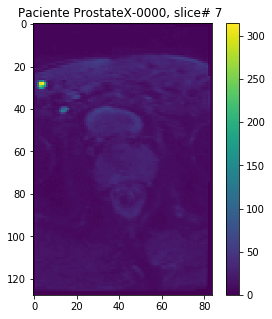

In [38]:
number = 0
kimg_3d = join_kimages_table.Kimg.iloc[number]
patient_id = join_kimages_table.ProxID.iloc[number]
ijk = join_kimages_table.ijk.iloc[number]
cancer = join_kimages_table.ClinSig.iloc[number]
slice_number = 7
plt.figure(figsize=(5,5))
plt.imshow(img_3d[slice_number])
plt.title("Paciente {}, slice# {} ".format(patient_id,slice_number))
plt.colorbar()
print("El paciente #{} {} cancer en la posición {}".format(patient_id,["tiene" if cancer == True else "no tiene"],ijk))

El paciente #ProstateX-0000 ['tiene'] cancer en la posición 36 72 9


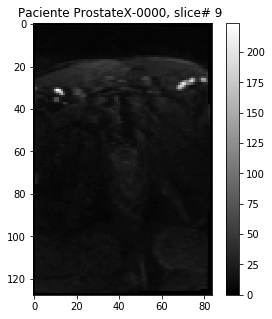

In [36]:
number = 1
img_3d = join_images_table.MRI.iloc[number]
patient_id = join_images_table.ProxID.iloc[number]
ijk = join_images_table.ijk.iloc[number]
cancer = join_images_table.ClinSig.iloc[number]
slice_number = 9
plt.figure(figsize=(5,5))
plt.imshow(img_3d[slice_number],cmap="gray")
plt.title("Paciente {}, slice# {} ".format(patient_id,slice_number))
plt.colorbar()
print("El paciente #{} {} cancer en la posición {}".format(patient_id,["tiene" if cancer == True else "no tiene"],ijk))